# Inter-rater Agreement Report
Agreement report: agreement_report.json


In [ ]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

report_path = Path("agreement_report.json")
if not report_path.exists():
    for parent in Path.cwd().parents:
        candidate = parent / report_path.name
        if candidate.exists():
            report_path = candidate
            break

report = json.loads(report_path.read_text())
pairwise = report.get('pairwise_cohen_kappa', {})
pairs = []
for k, v in pairwise.items():
    pairs.append({'pair': k, 'kappa': v.get('kappa'), 'n_common': v.get('n_common')})
df_pairs = pd.DataFrame(pairs) if pairs else pd.DataFrame(columns=['pair','kappa','n_common'])


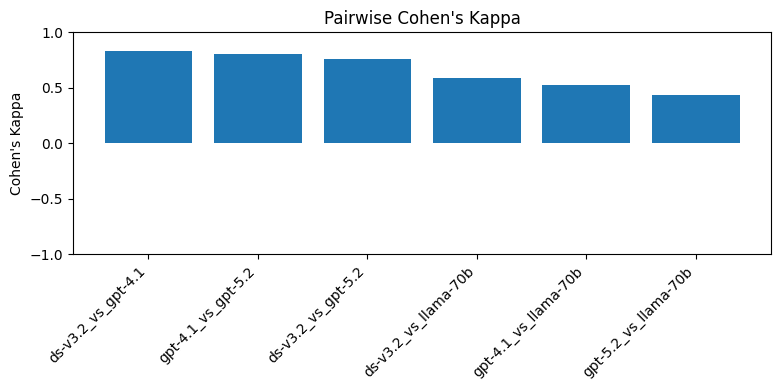

In [ ]:
# Pairwise Cohen's Kappa
plt.figure(figsize=(8,4))
if not df_pairs.empty:
    df_pairs = df_pairs.sort_values('kappa', ascending=False)
    plt.bar(df_pairs['pair'], df_pairs['kappa'], color='C0')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Cohen\'s Kappa')
    plt.title('Pairwise Cohen\'s Kappa')
    plt.ylim(-1,1)
    plt.tight_layout()
    plt.show()
else:
    print('No pairwise data available')


In [ ]:
# Fleiss' Kappa and Krippendorff's Alpha
print('Fleiss kappa:', report.get('fleiss_kappa'))
print('Krippendorff alpha:', report.get('krippendorff_alpha'))


Fleiss kappa: {'fleiss_kappa': 0.6413, 'n_items': 5795, 'n_judges': 4}
Krippendorff alpha: {'alpha': 0.693, 'n_items': 9516, 'n_judges': 4, 'n_total_ratings': 34343, 'items_with_missing': 3721}


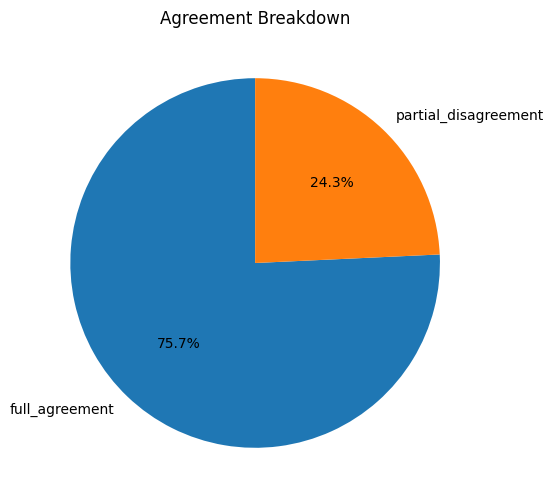

In [ ]:
# Agreement breakdown
breakdown = report.get('agreement_breakdown', {})
summary = breakdown.get('agreement_summary', {})
labels = ['full_agreement','partial_disagreement']
sizes = [summary.get('full_agreement',0), summary.get('partial_disagreement',0)]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Agreement Breakdown')
plt.show()


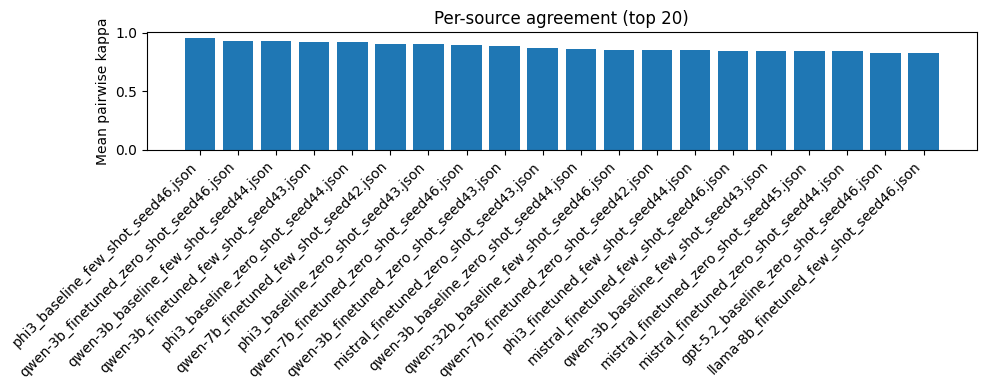

In [ ]:
# Per-source mean kappa (top sources)
per_source = report.get('per_source_file', {})
if per_source:
    df_src = pd.DataFrame([{'source': s, 'mean_kappa': v.get('mean_kappa')} for s, v in per_source.items()])
    df_src = df_src.dropna().sort_values('mean_kappa', ascending=False).head(20)
    plt.figure(figsize=(10,4))
    plt.bar(df_src['source'], df_src['mean_kappa'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean pairwise kappa')
    plt.title('Per-source agreement (top 20)')
    plt.tight_layout()
    plt.show()
else:
    print('No per-source data available')


In [ ]:
# Sample disagreements
dis = report.get('disagreements', {})
print('Total disagreements:', dis.get('total_count'))
for item in dis.get('sample', [])[:10]:
    print('---')
    print(item.get('item_key'))
    print(item.get('details'))
    print(item.get('ratings'))


Total disagreements: 2309
---
phi3_finetuned_zero_shot_seed46.json::a4d91fb553ffe4ff
{'input': 'The system and the controller together can guarantee that sooner or later consumption will be reduced.', 'gold': '<<ClimateSystem,Controller>>F consumption_reduced', 'prediction': '<<ControlSystem,Controller>>F consumption_reduced', 'source_file': 'phi3_finetuned_zero_shot_seed46.json', 'decision_method': 'llm'}
{'ds-v3.2': 'yes', 'gpt-4.1': 'no', 'gpt-5.2': 'no'}
---
phi3_finetuned_zero_shot_seed46.json::39d3058b3bc1abea
{'input': 'The system and the administrator together can guarantee that sooner or later security will be restored.', 'gold': '<<SecuritySystem,Admin>>F security_restored', 'prediction': '<<System,Admin>>F security_restored', 'source_file': 'phi3_finetuned_zero_shot_seed46.json', 'decision_method': 'llm'}
{'ds-v3.2': 'yes', 'gpt-4.1': 'yes', 'gpt-5.2': 'no'}
---
phi3_finetuned_zero_shot_seed46.json::52d5252ea0d3f083
{'input': 'The rover can guarantee that when it is ready to